In [1]:
import numpy as np
import healpy as hp
import mm_constrained_realizations as mmcr

In [2]:
import matplotlib.pyplot as plt
import planck_colormap
cm = planck_colormap.colormap()

%matplotlib inline

In [26]:
### set up - params
nside = 64
lmax = 3*nside//2
#fwhm = (160/60)*np.pi/180
### importing maps
weights_map = hp.read_map('Commander-Ruler/input_files/full_weights_map_08_0064.fits',
                          verbose=False)
cl = np.load('Commander-Ruler/input_files/cls_PlanckPR2_TT_lowp_lensing_lensed.npy')
tmap = hp.read_map('Commander-Ruler/input_files/commander_t_map.fits',
                   verbose=False)

noise_cov = hp.read_map('Commander-Ruler/input_files/commander_noise_cov.fits',
                        verbose=False)
mask = hp.read_map('Commander-Ruler/input_files/commander_mask.fits',
                   verbose=False)
tmap[mask==0] = hp.UNSEEN
### IMPORTANT ####
# as seen in prepping input files notebook
# bl is 1 for every ell at this scale so we wont smooth
# bumping nosie_cov low end
# noise_cov += 0

In [27]:
cr = mmcr.ConstrainedRealizations(nside,weights_map,mask=mask)

In [28]:
noise_cov[cr.mask.good_pix] += 1e4

In [29]:
cr.set_signal_cov(cl)
cr.set_noise_cov(noise_cov)

In [30]:
lamb_0 = 1e4
tp = 1e-4
cr.set_cooling_schedule(lamb_0,tp)

/home/marcio/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


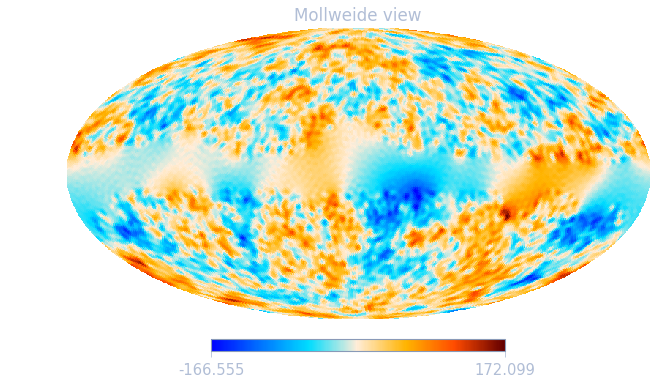

In [31]:
xlm = cr.wiener_filter_data(tmap)
x = hp.alm2map(xlm,cr.params.nside,cr.params.lmax,verbose=False)
hp.mollview(x,cmap=cm)

# flm = cr.gen_constrained_realization()
# f = hp.alm2map(flm,cr.params.nside,cr.params.lmax,verbose=False)
# hp.mollview(f,cmap=cm)

# hp.mollview(f+x,cmap=cm)

In [17]:
#np.save('Commander-Ruler/ComRul_WF_PPR1_n64_1e10_1em6',xlm)